# MA(q)

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

For $\text{MA}(q)$ it can be shown that,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\text{E}[X_t^2] = \nu^q_t = \sigma^2 \left( \sum_{i=1}^q \vartheta_i^2 + 1 \right) \\
&\text{E}[X_t X_{t+n}] = \sigma^2 \left( \sum_{i=i}^{q-n} \vartheta_i \vartheta_{i+n} + \vartheta_n \right)
\end{align}
$

The autocorrelation is defined by,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t+n}]}{\text{E}[X_t^2]}
\end{align}
$

Note that $\gamma_n$ is independent of $t$. This is in contrast to $\text{AR}(1)$ which depends on $t$. Also, for</br>
$n \geq q$ it is seen that $\gamma_n=0$.

### Example $\text{MA}(1)$

First consider $\text{MA}(1)$,

$
\begin{align}
X_t = \varepsilon_t + \vartheta_1 \varepsilon_{t-1}
\end{align}
$

The moments are given by,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\nu^1_t = \sigma^2 \left( \vartheta_1^2 + 1 \right) \\
\end{align}
$

For $n=1$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \theta_1 \\
&\rho_1 = \theta_1
\end{align}
$

and $n > 2$,

$
\begin{align}
&\text{E}[X_t X_{t+2}] = 0 \\
&\rho_n = 0
\end{align}
$

### Example $\text{MA}(2)$

Next consider $\text{MA}(2)$,

$
\begin{align}
X_t = \varepsilon_t + \vartheta_1 \varepsilon_{t-1} + \vartheta_2 \varepsilon_{t-2} 
\end{align}
$

The moments are given by,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\nu^2_t = \sigma^2 \left( \vartheta_1^2 + \vartheta_2^2 + 1 \right) \\
\end{align}
$

For $n=1$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \left( \vartheta_1 \vartheta_2 + \vartheta_1 \right) \\
&\rho_1 = \vartheta_1 \vartheta_2 + \vartheta_1 + \vartheta_2
\end{align}
$

For $n=2$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \vartheta_2 \\
&\rho_2 = \vartheta_2
\end{align}
$

and $n>2$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = 0 \\
&\rho_n = 0
\end{align}
$

### Relation to $\text{AR}(1)$
AR(1) is related to $\text{MA}(\infty)$. To see this consider $\text{AR}(1)$,

$
\begin{align}
X_t = \left( 1 - \varphi L \right)^{-1} \varepsilon_t
\end{align}
$

where $L$ is the shift operator,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

In the limit $t \to \infty$ it can be shown that for $\lvert \varphi \rvert < 1$,

$
\begin{align}
\left( 1 - \varphi L \right)^{-1} = \sum_{i = 0}^{\infty} \varphi^i L^i
\end{align}
$

It follows that,

$
\begin{align}
X_t = \sum_{i=0}^{\infty} \varphi^i L^i \varepsilon_t
\end{align}
$

which is $\text{MA}(\infty)$ with $\vartheta_i = \varphi^i$.


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats
from lib.plot_config import (PlotFuncType, PlotDataType, PlotAccumulationType)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1

def ma_ensemble(θ, nsample, nsim):
    series = numpy.array([arima.maq(θ2, nsample, σ)])
    for i in range(1, nsim):
        series = numpy.append(series, numpy.array([arima.maq(θ2, nsample, σ)]), axis=0)
    return series

## Simulations

In [3]:
nsample = 1000

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample, σ)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, 0.4, 0.5])
ma3 = arima.maq(θ3, nsample, σ)

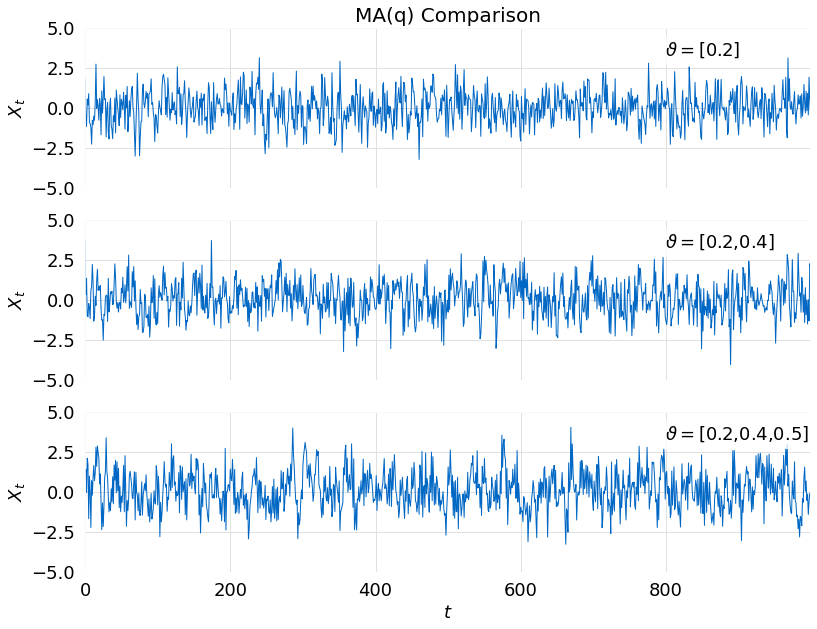

In [4]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels, plot_type=PlotDataType.TIME_SERIES)

In [5]:
nsample = 1000

θ1 = numpy.array([-0.2])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([-0.2, -0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, -0.4, -0.5])
ma3 = arima.maq(θ3, nsample)

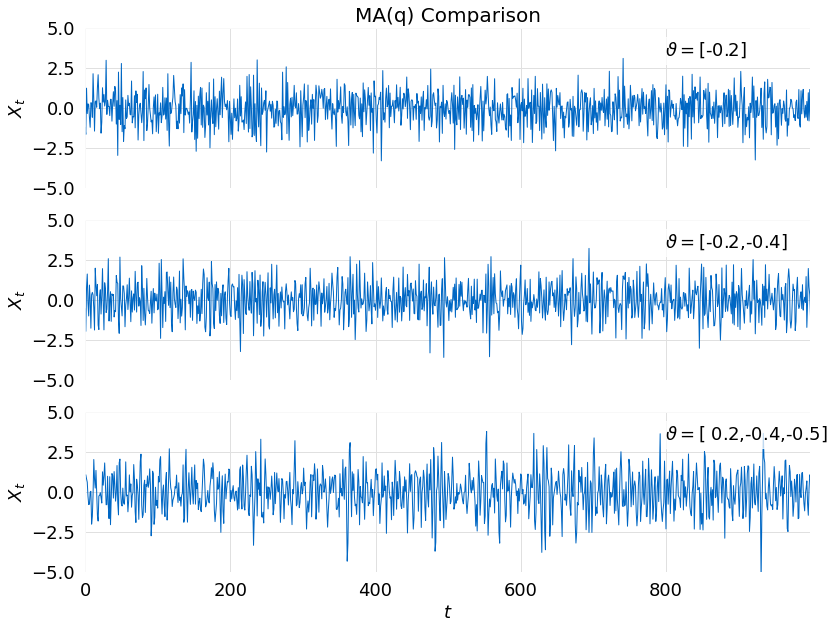

In [6]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels, plot_type=PlotDataType.TIME_SERIES)

In [7]:
θ1 = numpy.array([2.4])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([1.5, -1.5])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([1.2, -3.4, -1.5])
ma3 = arima.maq(θ3, nsample)

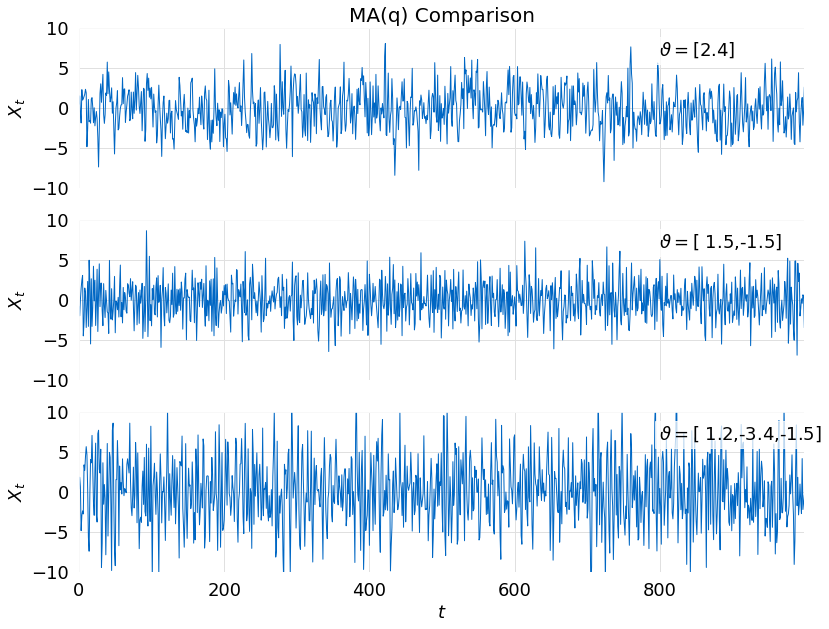

In [8]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-10.0, 10.0], title=title, labels=labels, plot_type=PlotDataType.TIME_SERIES)

## Mean

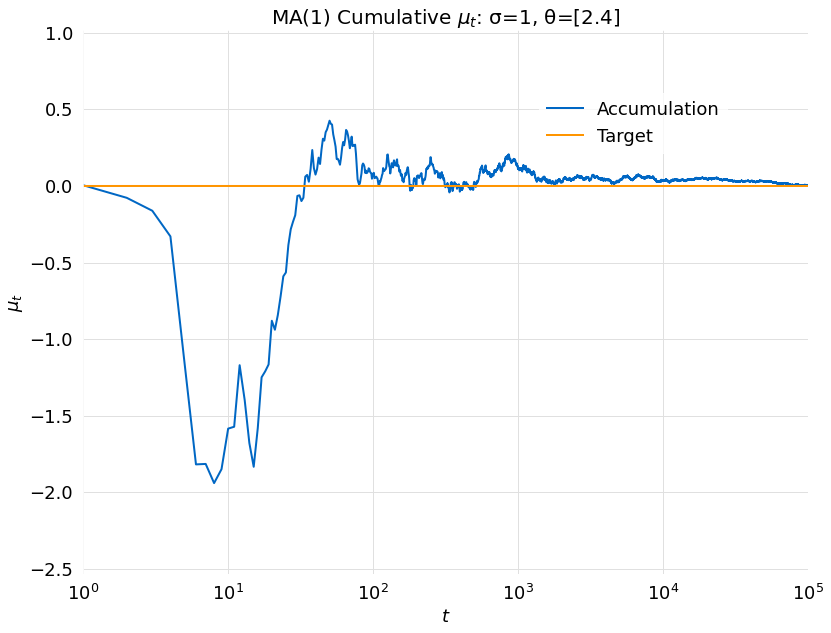

In [9]:
nsample = 100000
θ = numpy.array([2.4])
title = "MA(1) Cumulative " + r"$\mu_t$: " + f"σ={σ}, θ={θ}"
label = r"$\mu_t=0$"
samples = arima.maq(θ, nsample)
plots.cumulative(samples, PlotAccumulationType.MAQ_MEAN, title=title)

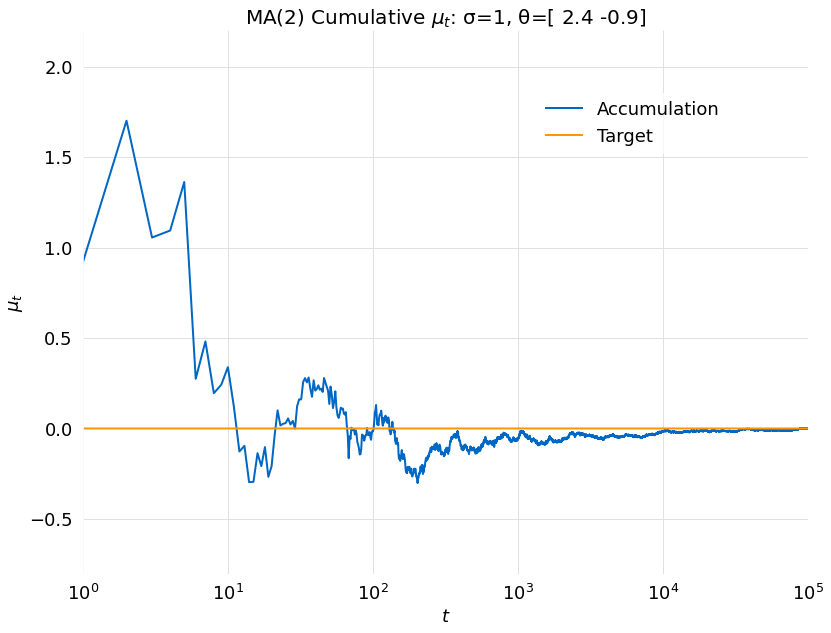

In [10]:
nsample = 100000
θ = numpy.array([2.4, -0.9])
title = "MA(2) Cumulative " + r"$\mu_t$: " + f"σ={σ}, θ={θ}"
label = r"$\mu_t=0$"
samples = arima.maq(θ, nsample)
plots.cumulative(samples, PlotAccumulationType.MAQ_MEAN, title=title)

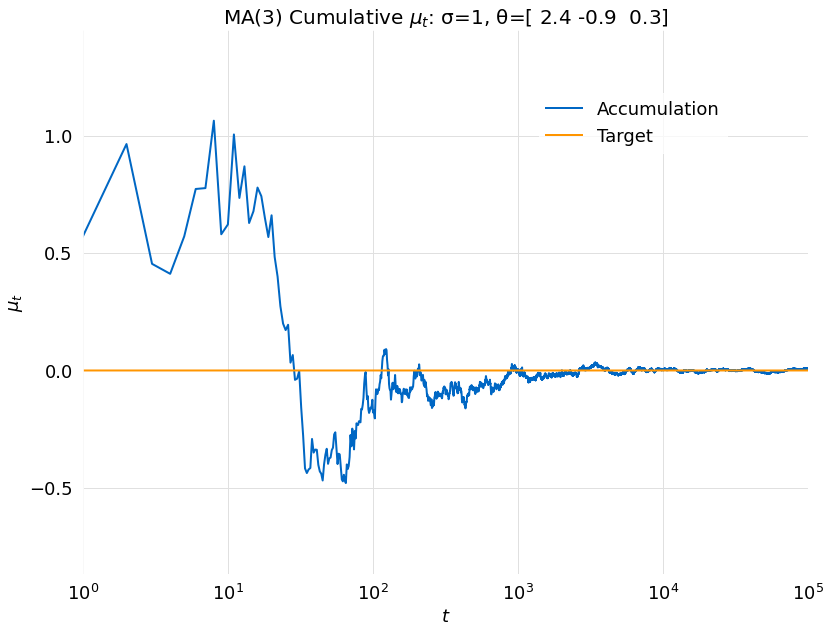

In [11]:
nsample = 100000
θ = numpy.array([2.4, -0.9, 0.3])
title = "MA(3) Cumulative " + r"$\mu_t$: " + f"σ={σ}, θ={θ}"
label = r"$\mu_t=0$"
samples = arima.maq(θ, nsample)
plots.cumulative(samples, PlotAccumulationType.MAQ_MEAN, title=title)

## Standard Deviation

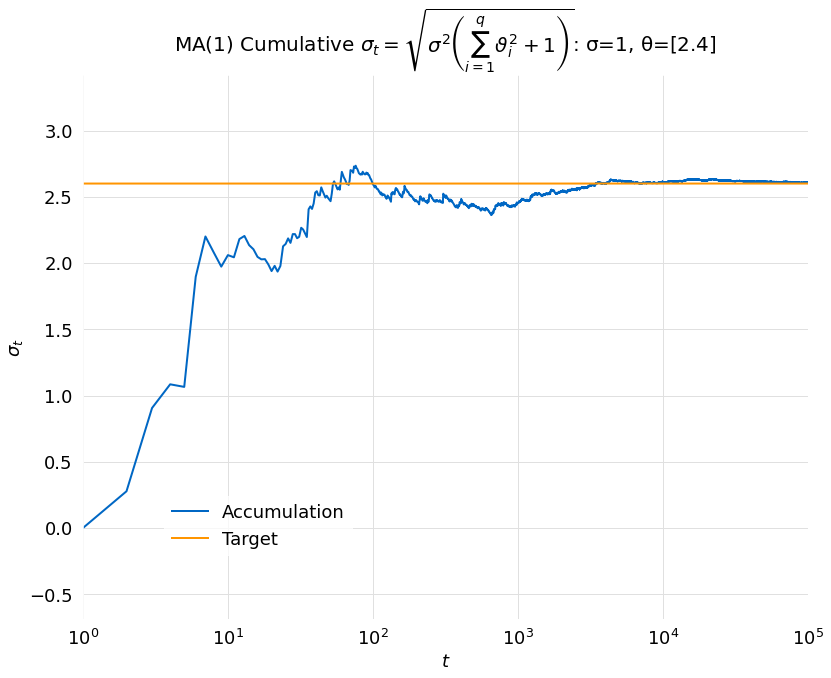

In [12]:
θ = numpy.array([2.4])
nsample = 100000
title = "MA(1) Cumulative " + r"$\sigma_t = \sqrt{\sigma^2 \left( \sum_{i=1}^q \vartheta_i^2 + 1 \right)}$: " + f"σ={σ}, θ={θ}"
samples = arima.maq(θ, nsample)
plots.cumulative(samples, PlotAccumulationType.MAQ_STD, title=title, params=[θ])

In [13]:
θ = numpy.array([2.4, -1.2])
nsample = 100000
label = r"$\sqrt{\nu^q_t} = \sqrt{\sigma^2 \left( \sum_{i=1}^q \vartheta_i^2 + 1 \right)}$"
samples = arima.maq(θ, nsample)
accum = stats.cumsigma(samples)
target = arima.maq_sigma(θ, σ)
title = "MA(2) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, θ={θ}"
plots.cumulative(accum, target, title=title, ylabel=r"$\sigma_t$", label=label)

AttributeError: 'numpy.float64' object has no attribute 'value'

In [ ]:
θ = numpy.array([2.4, -1.2, 0.6])
nsample = 100000
label = r"$\sqrt{\nu^q_t} = \sqrt{\sigma^2 \left( \sum_{i=1}^q \vartheta_i^2 + 1 \right)}$"
samples = arima.maq(θ, nsample)
accum = stats.cumsigma(samples)
target = arima.maq_sigma(θ, σ)
title = "MA(3) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, θ={θ}"
plots.cumulative(accum, target, title=title, ylabel=r"$\sigma_t$", label=label)

## Autocorrelation

In [ ]:
θ = numpy.array([0.2])
lag = 11
nsample = 50000
title = f"MA(1) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag-1)
plots.fcompare(ac, title=title, params=[θ, σ], npts=lag, plot_type=PlotFuncType.MAQ_ACF)

In [ ]:
θ = numpy.array([-0.2])
lag = 11
nsample = 50000
title = f"MA(1) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag-1)
plots.fcompare(ac, title=title, params=[θ, σ], npts=lag, plot_type=PlotFuncType.MAQ_ACF)

In [ ]:
θ = numpy.array([0.4, 0.2])
lag = 11
nsample = 50000
title = f"MA(2) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag-1)
plots.fcompare(ac, title=title, params=[θ, σ], npts=lag, plot_type=PlotFuncType.MAQ_ACF)

In [ ]:
θ = numpy.array([0.2, -0.2])
lag = 10
nsample = 50000
title = f"MA(2) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag-1)
plots.fcompare(ac, title=title, params=[θ, σ], npts=lag, plot_type=PlotFuncType.MAQ_ACF)

In [ ]:
θ = numpy.array([0.2, 0.3, 0.1])
lag = 10
nsample = 500000
title = f"MA() Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag-1)
plots.fcompare(ac, title=title, params=[θ, σ], npts=lag, plot_type=PlotFuncType.MAQ_ACF)

In [ ]:
θ = numpy.array([0.4, -0.2, -0.1])
lag = 10
nsample = 50000
title = f"MA(3) Autocorrelation: σ={σ}, φ={θ}"
samples = arima.maq(θ, nsample, σ)
ac = stats.acf(samples, lag-1)
plots.fcompare(ac, title=title, params=[θ, σ], npts=lag, plot_type=PlotFuncType.MAQ_ACF)